# Convert m4a to wav

In [20]:
import os

# Root = "audio_data/"
filename = "female_phone_2"
destination = filename
os.chdir('C://Users/jason/OneDrive/Desktop/jupyter/audio/audio_data/labeling_samples')
print(os.getcwd())
# ffmpeg 설정이 필수
os.system('ffmpeg -i {} -f wav -ab 16000 -vn {}.wav'.format(filename + ".m4a", destination))

C:\Users\jason\OneDrive\Desktop\jupyter\audio\audio_data\labeling_samples


0

# Wave plot

<ipython-input-21-01d73e277bcb>:46: RuntimeWarning: invalid value encountered in double_scalars
  sub_data = [sound ** 1.2 for sound in lowered_noise]
<ipython-input-21-01d73e277bcb>:46: RuntimeWarning: invalid value encountered in power
  sub_data = [sound ** 1.2 for sound in lowered_noise]


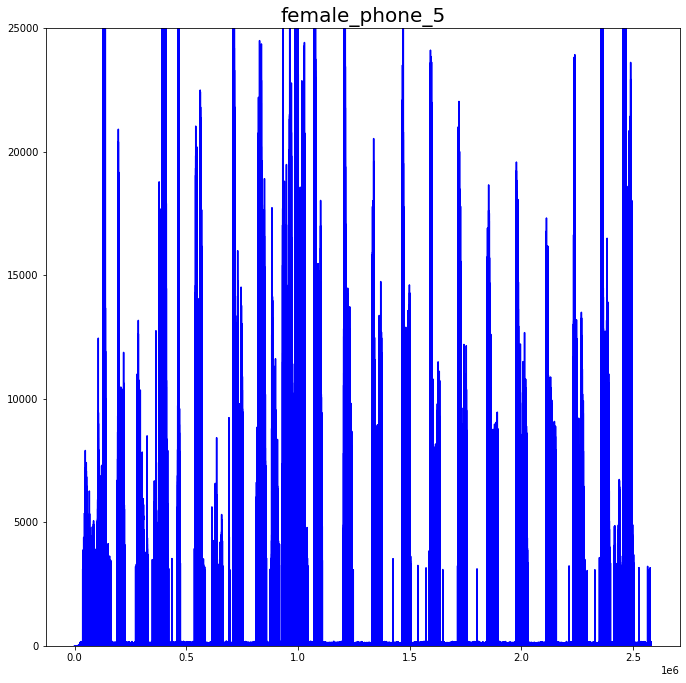

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
import os
import IPython.display as ipd
from scipy.io import wavfile
from IPython.display import Audio
import matplotlib.patches as mpatches
import math

os.chdir('C://Users/jason/OneDrive/Desktop/jupyter/audio/audio_data/labeling_samples')
file_name1 = 'female_phone_2'
fig = plt.figure(figsize=(25,25))

def plot_wav(file_name, index):
    samplerate, data = wavfile.read(file_name + '.wav')

    global fig
    subplt = plt.subplot(2, 2, index)
    subplt.set_ylim(0,25000)

    subplt.spines['bottom'].set_color('black')
    subplt.tick_params(axis='x', colors='black')
    subplt.spines['left'].set_color('black')
    subplt.tick_params(axis='y', colors='black')

    plt.title(file_name, fontdict={'fontsize': 20, 'color': 'black'})
    
    data = data[:int(len(data)/10)]  # PHONE

    lowered_noise = [sound/10 if abs(sound) < 800 else sound for sound in data]
    sub_data = [sound ** 1.2 for sound in lowered_noise]

    #phone
    plt.plot(sub_data, 'b', label="modified")


plot_wav(file_name1, 1)
plt.show()

# 자르기 

In [1]:
import numpy as np
import sys
import os
import IPython.display as ipd
from scipy.io import wavfile
from IPython.display import Audio

os.chdir('C://Users/jason/OneDrive/Desktop/jupyter/audio/audio_data/labeling_samples')
file_name = 'female_phone_2'

if not os.path.exists(file_name + '_samples'):
    os.mkdir(file_name + '_samples')
# os.chdir(file_name + '_samples')
THRESHOLD = 20000
SAMPLE_LENGTH = 1  #1초
SHIFT = 0.15 #0.1초

def audio_export(file_name, file_index, data, samplerate):
    wavfile.write(file_name + '_{}.wav'.format(file_index), samplerate, data.astype(np.int16))
    

def filter_silence(data, samplerate, threshold=THRESHOLD, sample_length=SAMPLE_LENGTH):
    
    frames_in_sample = int(sample_length * samplerate)
    over_threshold_counter = 0
    
    for sound in data:
        if sound > THRESHOLD:
            over_threshold_counter += 1
      
    # 0.001% 의 소리가 threshold를 넘으면 true를 반환한다.
    if (over_threshold_counter / frames_in_sample) > 0.00001:
        return True
    else:
        return False

def sampling(file_name, threshold=THRESHOLD, sample_length=SAMPLE_LENGTH, shift=SHIFT):
    
    samplerate, data = wavfile.read(file_name + '.wav')
    os.chdir('C://Users/jason/OneDrive/Desktop/jupyter/audio/audio_data/labeling_samples/' + file_name + '_samples')
    frames_in_sample = int(sample_length * samplerate)
    frames_in_shift = int(shift * samplerate)
    frames_in_jump = int(0.5 * samplerate)

    # 임시로 데이터를 사이즈 줄인다
#     data = data[:int(len(data)/10)]
    lowered_noise = [sound/10 if abs(sound) < 800 else sound for sound in data]
    sub_data = [sound ** 1.2 for sound in lowered_noise]
    start_index = 0
    end_index = 0
    file_index = 1
    
    for i, intensity in enumerate(sub_data):
        
        if i > end_index + frames_in_shift * 2:
        
            if intensity > threshold:

                start_index = i - frames_in_shift
                end_index = start_index + frames_in_sample

                # 오디오 파일 처음에 음성이 짤려서 나오거나 마지막에 음성이 짤리면 데이터를 버린다
                if start_index < 0:
                    end_index = i + frames_in_jump
                
                if end_index > len(data):
                    break
                
                if start_index > 0 and end_index < len(data) and filter_silence(sub_data[start_index:end_index], samplerate):
                    audio_export(file_name, file_index, data[start_index:end_index], samplerate)
                    file_index += 1
                    

sampling(file_name)


<ipython-input-1-7b46771cb180>:48: RuntimeWarning: invalid value encountered in double_scalars
  sub_data = [sound ** 1.2 for sound in lowered_noise]
<ipython-input-1-7b46771cb180>:48: RuntimeWarning: invalid value encountered in power
  sub_data = [sound ** 1.2 for sound in lowered_noise]
